<a href="https://colab.research.google.com/github/sandeepss2020/Machine-Learning/blob/main/ML_LAB5_Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data = pd.read_csv('Salary.csv')
x = data['Median_weekly_earnings_in_constant_dollars_men']
y = data['Median_weekly_earnings_in_constant_dollars_Women']
data = list(zip(x, y))
print(data)

[(379, 307), (384, 304), (374, 309), (377, 308), (376, 308), (370, 306), (370, 306), (370, 301), (369, 302), (368, 303), (380, 300), (364, 302), (375, 298), (370, 301), (372, 304), (367, 302), (369, 304), (367, 304), (363, 302), (370, 304), (371, 306), (377, 307), (376, 306), (377, 306), (380, 307), (380, 312), (382, 311), (381, 312), (382, 314), (385, 311), (385, 320), (385, 314), (381, 312), (383, 311), (385, 312), (389, 318), (392, 315)]


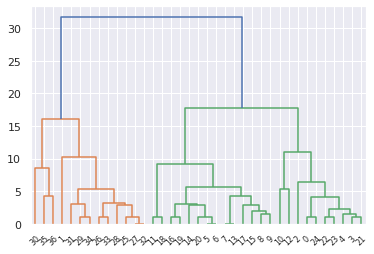

In [ ]:
linkage_data = linkage(data, method='complete', metric='euclidean') #check with #single complete #ward
dendrogram(linkage_data)
plt.show()


[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


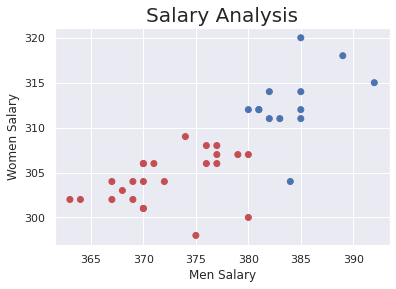

In [ ]:
from matplotlib import colors
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete') 
#Number of clusters will be detrmined by means of Elbow Method,  Silhouette #Coefficient, Dendrogram 
labels = hierarchical_cluster.fit_predict(data) 
print(labels)
plt.xlabel('Men Salary')
plt.ylabel('Women Salary')
plt.title('Salary Analysis', fontsize = 20)
# plt.scatter(x, y, c=labels)
# plt.show()
colors = ['r','b','y','g','c','m']
plt.scatter(x,y, color=[colors[l_] for l_ in labels], label=labels)
plt.show() 


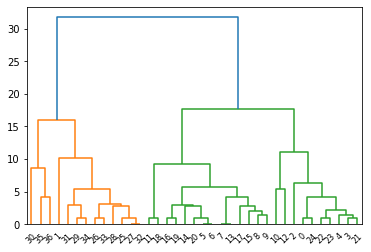

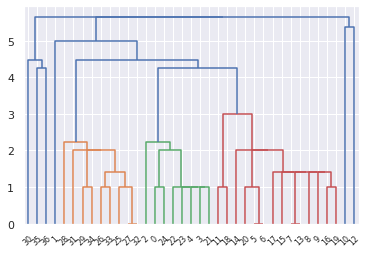

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1]


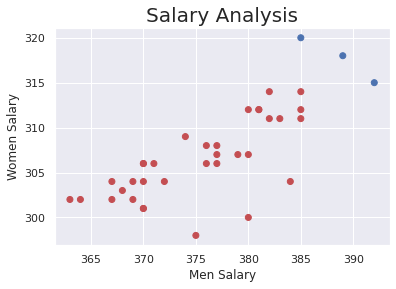

In [ ]:
linkage_data2 = linkage(data, method='single', metric='euclidean')
dendrogram(linkage_data2)
plt.show()


hierarchical_cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single') 
labels2 = hierarchical_cluster2.fit_predict(data) 
print(labels2)
plt.xlabel('Men Salary')
plt.ylabel('Women Salary')
plt.title('Salary Analysis', fontsize = 20)
colors = ['r','b','y','g','c','m']
plt.scatter(x,y, color=[colors[l_] for l_ in labels2], label=labels2)
plt.show() 


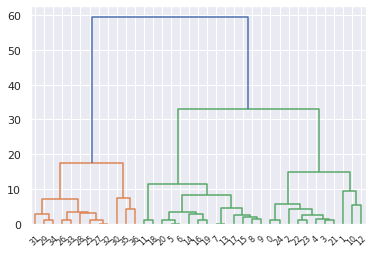

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1]


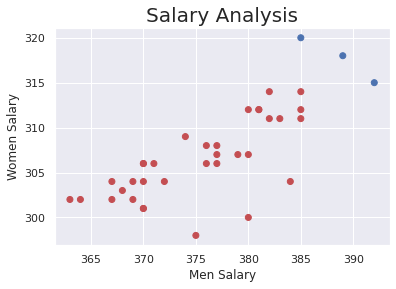

In [ ]:
linkage_data3 = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data3)
plt.show()

hierarchical_cluster3 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single') 
labels3 = hierarchical_cluster3.fit_predict(data) 
print(labels3)
plt.xlabel('Men Salary')
plt.ylabel('Women Salary')
plt.title('Salary Analysis', fontsize = 20)
colors = ['r','b','y','g','c','m']
plt.scatter(x,y, color=[colors[l_] for l_ in labels3], label=labels3)
plt.show() 

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state = 0)

In [ ]:
print(x_train)

36    392
34    385
29    385
33    383
8     369
13    370
5     370
17    367
14    372
7     370
27    381
1     384
12    375
26    382
24    380
6     370
23    377
4     376
18    363
21    377
19    370
9     368
35    389
3     377
0     379
Name: Median_weekly_earnings_in_constant_dollars_men, dtype: int64


In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

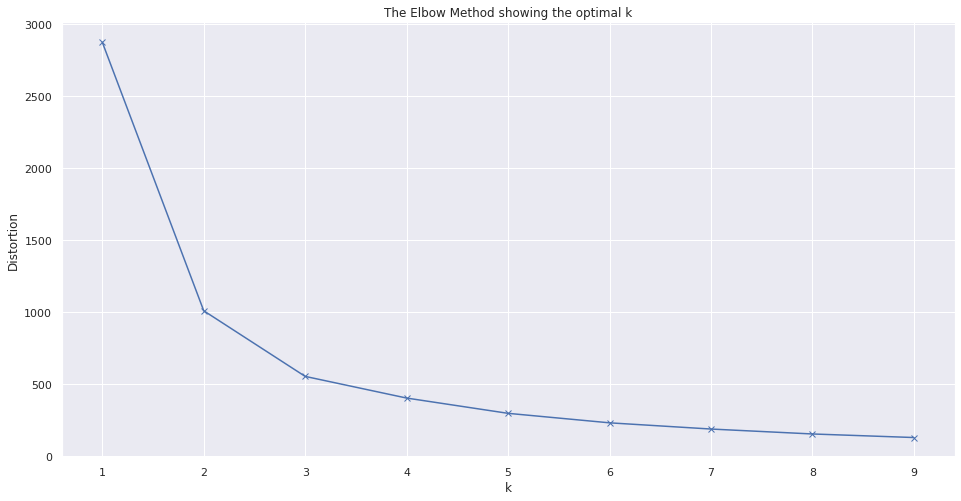

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# ***NEW APPROACH ***

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [ ]:
X = pd.read_csv('Salary.csv')
 
# Dropping the COlumns
X = X.drop(['Year','Quarter','workers_in_thousands_Total', 'workers_in_thousands_Women',
           'workers_in thousands_Men','label'] ,axis =1)
 
# Handling the missing values
# X.fillna(method ='ffill', inplace = True)


scaler = StandardScaler()     # Scaling the data so that all the features become comparable
X_scaled = scaler.fit_transform(X)
 
X_normalized = normalize(X_scaled)
 
X_normalized = pd.DataFrame(X_normalized)

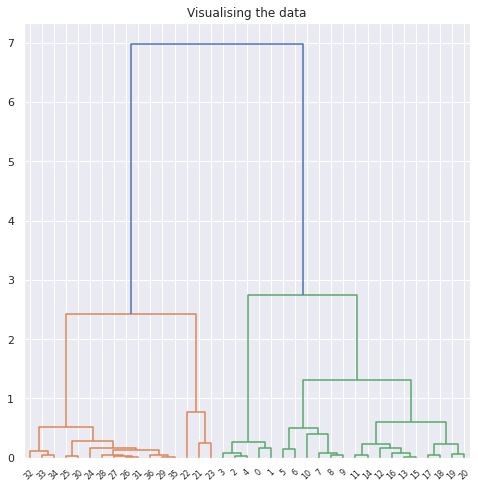

In [ ]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

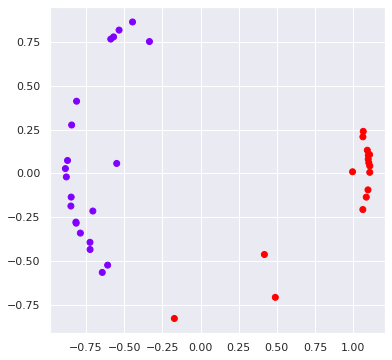

In [ ]:

ac2 = AgglomerativeClustering(n_clusters = 2)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

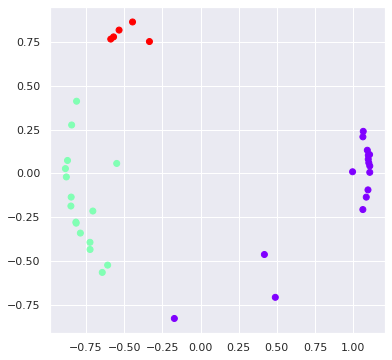

In [ ]:

ac3 = AgglomerativeClustering(n_clusters = 3)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

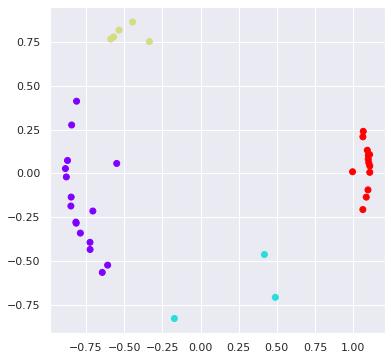

In [ ]:

ac4 = AgglomerativeClustering(n_clusters = 4)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

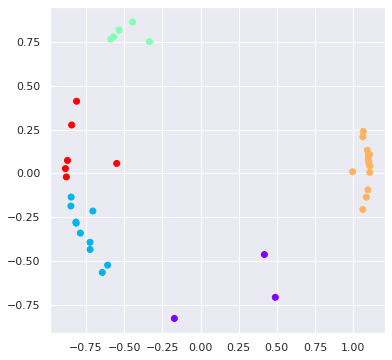

In [ ]:

ac5 = AgglomerativeClustering(n_clusters = 5)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

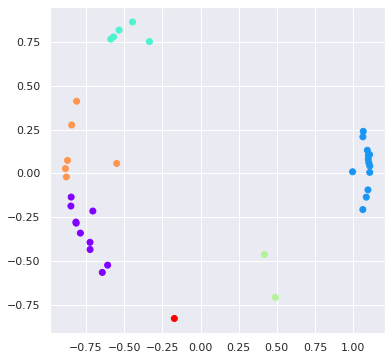

In [ ]:

ac6 = AgglomerativeClustering(n_clusters = 6)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

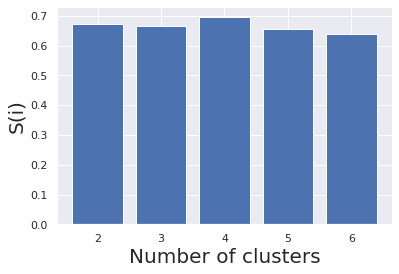

In [ ]:

k = [2, 3, 4, 5, 6]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()